## Clustering Task 2 - HDBSCAN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import sklearn.mixture as mixture

import sys
sys.path.append('../resources')
import w8support as w8s

# Make sure the pic subdirectory exists
import os, errno
try:
    os.makedirs('pic')
except OSError as e:
    if e.errno != errno.EEXIST:
        raise

%matplotlib inline

sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 15, 'linewidths':0}
paletteName = 'deep'
fontSize = 10
fc = '#cccccc'

featureSub = pd.read_csv("oheTransformedData.csv")
nClusters = 6

from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(featureSub)
data.shape

(10108, 2)

0.37748074531555176


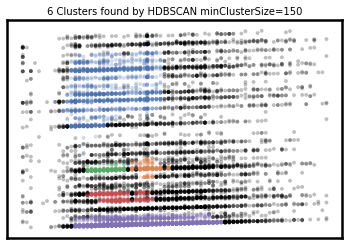

In [2]:
# import originalFeatureSubset for use with label assignment
originalFeatureSubset = pd.read_csv("originalFeatureSubset.csv")

import hdbscan
algName = "HDBSCAN"
for minClusterSize in [150]:
    clusterParams = {'min_cluster_size':minClusterSize}
    start_time = time.time()
    hdbscanModel = hdbscan.HDBSCAN(**clusterParams)
    labels = hdbscanModel.fit_predict(data)
    
    # Add cluster labels to original dataframe for review and interpretation of cluster results.
    originalFeatureSubset['CLUSTERS'] = pd.Series(labels, index=originalFeatureSubset.index)
    
    # Subsequently, this will be invoked using a function call of the form
    # hdbscan, labels = w8s.fitClusterLabels(data, hdbscan.HDBSCAN, (), clusterParams)
    end_time = time.time()
    elapsed_time = end_time-start_time
    print(elapsed_time)
    
    plt.clf() # Start new plot
    nClusters = len(set(labels))
    title = '{} Clusters found by {} minClusterSize={}'.format(str(nClusters),algName,str(minClusterSize))
    plt = w8s.plot_2dClusters(data, labels, title, paletteName, fontSize, plot_kwds)
    outFile = 'pic/{}{}_{}_generated.pdf'.format(algName,str(nClusters),str(minClusterSize))
    plt.savefig(outFile)

I had to play around with the minClusterSize with various parameters. 90 and 200 were both giving me 3 cluster results. When the range was set to 150 I got 6 clusters. This was chosen for analysis as I have used 6 clusters in my other algorithms.

In [3]:
# Check cluster column is present in dataframe.
originalFeatureSubset.head(5)

who Years_on_Internet Web_Ordering  Age  Not_Purchasing_Too_complicated  \
0  93819            1-3_yr          Yes   41                               0   
1  95708        Under_6_mo          Yes   28                               0   
2  97218            1-3_yr          Yes   25                               0   
3  91627            1-3_yr          Yes   28                               0   
4  49906            1-3_yr          Yes   17                               0   

   Not_Purchasing_Prefer_people  Not_Purchasing_Privacy  \
0                             0                       0   
1                             0                       0   
2                             0                       1   
3                             0                       0   
4                             0                       0   

   Not_Purchasing_Security  Not_Purchasing_Easier_locally  CLUSTERS  
0                        0                              0         4  
1                        1                              0         2  
2                        0                              1         3  
3                        0                              0         4  
4                        0                              0        -1

### Analyse HDBSCAN cluster groups
Now lets look at which features trend in to which clusters.

We will start with the boolean inputs:

In [4]:
for x in [0, 1, 2, 3, 4, 5]:
    for col in ['Not_Purchasing_Too_complicated', 'Not_Purchasing_Prefer_people','Not_Purchasing_Privacy', 'Not_Purchasing_Security', 'Not_Purchasing_Easier_locally']:
        clusterName = str(x)
        rowCount = str(len(originalFeatureSubset.loc[(originalFeatureSubset[col]) & (originalFeatureSubset.CLUSTERS == x)]))

        print('CLUSTER ' + clusterName + ' COUNT IS: ' + rowCount + ' for feature: ' + col)
    print('************************************************************')

CLUSTER 0 COUNT IS: 104 for feature: Not_Purchasing_Too_complicated
CLUSTER 0 COUNT IS: 283 for feature: Not_Purchasing_Prefer_people
CLUSTER 0 COUNT IS: 533 for feature: Not_Purchasing_Privacy
CLUSTER 0 COUNT IS: 903 for feature: Not_Purchasing_Security
CLUSTER 0 COUNT IS: 351 for feature: Not_Purchasing_Easier_locally
************************************************************
CLUSTER 1 COUNT IS: 18 for feature: Not_Purchasing_Too_complicated
CLUSTER 1 COUNT IS: 37 for feature: Not_Purchasing_Prefer_people
CLUSTER 1 COUNT IS: 198 for feature: Not_Purchasing_Privacy
CLUSTER 1 COUNT IS: 262 for feature: Not_Purchasing_Security
CLUSTER 1 COUNT IS: 54 for feature: Not_Purchasing_Easier_locally
************************************************************
CLUSTER 2 COUNT IS: 16 for feature: Not_Purchasing_Too_complicated
CLUSTER 2 COUNT IS: 5 for feature: Not_Purchasing_Prefer_people
CLUSTER 2 COUNT IS: 229 for feature: Not_Purchasing_Privacy
CLUSTER 2 COUNT IS: 251 for feature: Not_Purch

In [5]:
# We get the average age per cluster next to aid in the age exploration on this feature subset
originalFeatureSubset.groupby(['CLUSTERS'])['Age'].mean()

CLUSTERS
-1    40.684508
 0    23.672497
 1    28.951852
 2    25.604651
 3    27.846899
 4    33.259626
Name: Age, dtype: float64

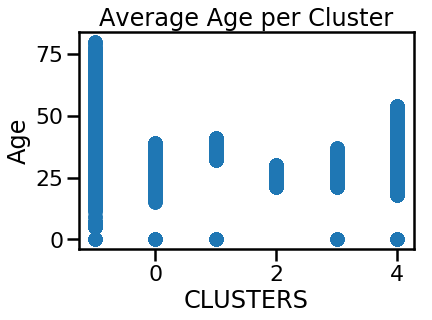

In [6]:
import matplotlib.pyplot as plt
plt.scatter(originalFeatureSubset['CLUSTERS'], originalFeatureSubset['Age'],)
plt.title("Average Age per Cluster")
plt.xlabel("CLUSTERS")
plt.ylabel("Age")
plt.show() # Depending on whether you use IPython or interactive mode, etc.

In [7]:
# Next we check the Years_on_Internet options in the dataset for use with grouping for the clusters
originalFeatureSubset.Years_on_Internet.unique()

array(['1-3_yr', 'Under_6_mo', '4-6_yr', '6-12_mo', 'Over_7_yr'],
      dtype=object)

In [8]:
# Next lets view results per cluster for most populate answer to Years_on_Internet
for x in [0, 1, 2, 3, 4, 5]:
    for result in ['1-3_yr', 'Under_6_mo', '4-6_yr', '6-12_mo', 'Over_7_yr']:
        clusterName = str(x)
        rowCount = str(len(originalFeatureSubset[originalFeatureSubset['Years_on_Internet'].str.contains(result) & (originalFeatureSubset.CLUSTERS == x)]))

        print('CLUSTER ' + clusterName + ' COUNT IS: ' + rowCount + ' for feature: ' + result + ' for Years_on_Internet')
    print('************************************************************')

CLUSTER 0 COUNT IS: 668 for feature: 1-3_yr for Years_on_Internet
CLUSTER 0 COUNT IS: 402 for feature: Under_6_mo for Years_on_Internet
CLUSTER 0 COUNT IS: 219 for feature: 4-6_yr for Years_on_Internet
CLUSTER 0 COUNT IS: 312 for feature: 6-12_mo for Years_on_Internet
CLUSTER 0 COUNT IS: 57 for feature: Over_7_yr for Years_on_Internet
************************************************************
CLUSTER 1 COUNT IS: 116 for feature: 1-3_yr for Years_on_Internet
CLUSTER 1 COUNT IS: 42 for feature: Under_6_mo for Years_on_Internet
CLUSTER 1 COUNT IS: 61 for feature: 4-6_yr for Years_on_Internet
CLUSTER 1 COUNT IS: 34 for feature: 6-12_mo for Years_on_Internet
CLUSTER 1 COUNT IS: 17 for feature: Over_7_yr for Years_on_Internet
************************************************************
CLUSTER 2 COUNT IS: 102 for feature: 1-3_yr for Years_on_Internet
CLUSTER 2 COUNT IS: 23 for feature: Under_6_mo for Years_on_Internet
CLUSTER 2 COUNT IS: 112 for feature: 4-6_yr for Years_on_Internet
CLUSTE

In [9]:
# Next we double check the Web_Ordering options in the dataset are just Yes / No / Dont_know for use with grouping for the clusters
originalFeatureSubset.Web_Ordering.unique()

array(['Yes', 'No', 'Dont_know'], dtype=object)

In [10]:
# Next lets view results per cluster for most populate answer to Web Ordering
for x in [0, 1, 2, 3, 4, 5]:
    for result in ['Yes', 'No', 'Dont_know']:
        clusterName = str(x)
        rowCount = str(len(originalFeatureSubset[originalFeatureSubset['Web_Ordering'].str.contains(result) & (originalFeatureSubset.CLUSTERS == x)]))

        print('CLUSTER ' + clusterName + ' COUNT IS: ' + rowCount + ' for feature: ' + result + ' for Web_Ordering')
    print('************************************************************')

CLUSTER 0 COUNT IS: 3 for feature: Yes for Web_Ordering
CLUSTER 0 COUNT IS: 1645 for feature: No for Web_Ordering
CLUSTER 0 COUNT IS: 10 for feature: Dont_know for Web_Ordering
************************************************************
CLUSTER 1 COUNT IS: 267 for feature: Yes for Web_Ordering
CLUSTER 1 COUNT IS: 0 for feature: No for Web_Ordering
CLUSTER 1 COUNT IS: 3 for feature: Dont_know for Web_Ordering
************************************************************
CLUSTER 2 COUNT IS: 253 for feature: Yes for Web_Ordering
CLUSTER 2 COUNT IS: 0 for feature: No for Web_Ordering
CLUSTER 2 COUNT IS: 5 for feature: Dont_know for Web_Ordering
************************************************************
CLUSTER 3 COUNT IS: 516 for feature: Yes for Web_Ordering
CLUSTER 3 COUNT IS: 0 for feature: No for Web_Ordering
CLUSTER 3 COUNT IS: 0 for feature: Dont_know for Web_Ordering
************************************************************
CLUSTER 4 COUNT IS: 2623 for feature: Yes for Web_Orde

### HDBSCAN Results Summary for Clusters for Age Related Web Purchasing Features.
For each cluster I have taken the approach of pulling the largest values for each clusters based on what has been analysed above.

### cluster 0
* Average age of candidates for cluster 0 was 23.
* This candidates main concern for not purchasing something was Not_Purchasing_Security (903).
* This candidates typical Years_on_Internet was 1-3_yr (668) .
* Most answered No for Web_Ordering for this candidate (1645).

### cluster 1
* Average age of candidates for cluster 1 was 28.
* This candidates main concern for not purchasing something was Not_Purchasing_Security (262).
* This candidates typical Years_on_Internet was 1-3years (116).
* Most answered Yes for Web_Ordering for this candidate (267).

### cluster 2
* Average age of candidates for cluster 2 was 25.
* This candidates main concern for not purchasing something was Not_Purchasing_Security (251).
* This candidates typical Years_on_Internet was 1-3years (102).
* Most answered Yes for Web_Ordering for this candidate (253).

### cluster 3
* Average age of candidates for cluster 3 was 27.
* This candidates main concern for not purchasing something was Not_Purchasing_Security (255).
* This candidates typical Years_on_Internet was 1-3years (230).
* Most answered Yes for Web_Ordering for this candidate (516) and 0 results for No and Dont_Know.

### cluster 4
* Average age of candidates for cluster 4 was 33.
* This candidates main concern for not purchasing something was Not_Purchasing_Easier_locally (533).
* This candidates typical Years_on_Internet was 1-3years (1394).
* Most answered Yes for Web_Ordering for this candidate (2623) and 0 results for No and Dont_Know.

### cluster 5
* No Average age for cluster 5.
* No results for main concern for purchasing.
* No Years_on_Internet cluster results for cluster 5 (not present).
* No Web_Ordering cluster results for cluster 5 (not present)

## Advantages / Disadvantages of HDBSCAN for Internet Usage DataSet:

### Advantages

* HBDBScan doesn’t need number of clusters for prediction unlike k-means, it works on a sizing basis.
* HBDBSCAN runtime is very fast.
* Scalable approach by abjusting min cluster size.


### Disavantages
* HBDBScan doesn’t seem to work well over clusters with different densities as is the case with this data set features.
* HBDBScan was very sensitive to the switching of minClusterSize which was mentioned previously with the various inouts tried (90, 150, 200).
* HBDBScan does not filter out noise very well unlike k-means and gave 0 result clusters, particularly with cluster 5.
* Subset Performance and approximation was not as good as other algorithms. If you have a huge dataset, you can just take a random sample for k-means, and statistics says you'll get almost the same result. For HDBSCAN, it's not clear how to use it only with a subset of the data.